[-1, 0, -1, 0, -1, 0]
coeficientes: [ 0.08571429 -0.71428571]


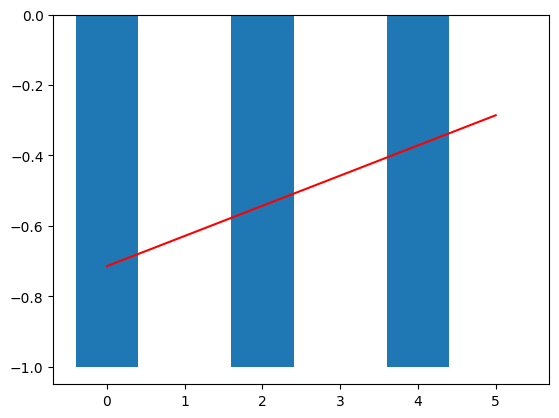

pendiente: 0.08571
La gráfica es bajista.


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo

valores = [-1,0,-1,0,-1,0]
categorias = [i for i in range(len(valores))]
window = -20
# Crear gráfica de barras
fig, ax = plt.subplots()
ax.bar(categorias, valores)
print(valores[window:])
# Calcular la pendiente de la regresión lineal
x_numerico = np.arange(len(valores[window:]))
coeficientes = np.polyfit(x_numerico, valores[window:], 1)
pendiente = coeficientes[0]
print(f"coeficientes: {coeficientes}")
# Dibujar la línea de tendencia
tendencia = np.poly1d(coeficientes)
plt.plot(categorias[window:], tendencia(x_numerico), color='red')

# Mostrar gráfica
plt.show()

# Determinar si es alcista o bajista
print(f"pendiente: {round(pendiente,5)}")
if pendiente > 0.1:
    print("La gráfica es alcista.")
else:
    print("La gráfica es bajista.")